In [ ]:
!kaggle datasets download -d behrad3d/nasa-cmaps

Dataset URL: https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
License(s): CC0-1.0
 73% 9.00M/12.3M [00:00<00:00, 28.4MB/s]
100% 12.3M/12.3M [00:00<00:00, 38.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/nasa-cmaps.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_dataset_path = '/content/CMaps/train_FD001.txt'
test_dataset_path = '/content/CMaps/test_FD001.txt'

In [ ]:
column_names = ['engine_id', 'time_cycle', 'op_setting_1', 'op_setting_2',
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]

In [ ]:
train_df = pd.read_csv(train_dataset_path, sep=' ', header=None, names=column_names,index_col=False)
test_df = pd.read_csv(test_dataset_path, sep=' ', header=None, names=column_names,index_col=False)

<ipython-input-7-d3785fa1bd35>:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_df = pd.read_csv(train_dataset_path, sep=' ', header=None, names=column_names,index_col=False)
<ipython-input-7-d3785fa1bd35>:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_df = pd.read_csv(test_dataset_path, sep=' ', header=None, names=column_names,index_col=False)


In [ ]:
train_df.shape , test_df.shape

((20631, 26), (13096, 26))

In [ ]:
train_df.head()

,engine_id,time_cycle,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
train_df.describe()

,engine_id,time_cycle,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
test_df.describe()

,engine_id,time_cycle,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_12,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,...,0.559627,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,-0.000000,-0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [ ]:
def add_labels(df, window=30):
    df['label'] = 0
    for engine_id in df['engine_id'].unique():
        engine_data = df[df['engine_id'] == engine_id]
        last_cycle = engine_data['time_cycle'].max()
        fail_label_indices = engine_data[engine_data['time_cycle'] > last_cycle - window].index
        df.loc[fail_label_indices, 'label'] = 1
    return df


In [ ]:
train_df = add_labels(train_df)
test_df = add_labels(test_df)

In [ ]:
train_df['label'].value_counts()

,count
label,
0,17631
1,3000


In [ ]:
# Standardize sensor data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sensor_cols = [f'sm_{i}' for i in range(1, 22)]

In [ ]:
train_df[sensor_cols] = scaler.fit_transform(train_df[sensor_cols])
test_df[sensor_cols] = scaler.transform(test_df[sensor_cols])

In [ ]:
train_df.head()

,engine_id,time_cycle,op_setting_1,op_setting_2,op_setting_3,sm_1,sm_2,sm_3,sm_4,sm_5,...,sm_13,sm_14,sm_15,sm_16,sm_17,sm_18,sm_19,sm_20,sm_21,label
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,-1.058890,-0.269071,-0.603816,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,0
1,1,2,0.0019,-0.0003,100.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,-0.363646,-0.642845,-0.275852,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,0
2,1,3,-0.0043,0.0003,100.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,-0.919841,-0.551629,-0.649144,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,0
3,1,4,0.0007,0.0000,100.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,-0.224597,-0.520176,-1.971665,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,0
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,-0.780793,-0.521748,-0.339845,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,0


In [ ]:
# Create sequences of data for LSTM (windowing)
def create_sequences(df, sequence_length=30):
    sequences = []
    labels = []
    for engine_id in df['engine_id'].unique():
        engine_data = df[df['engine_id'] == engine_id].sort_values(by='time_cycle')
        for i in range(len(engine_data) - sequence_length + 1):
            sequence = engine_data.iloc[i:i+sequence_length][sensor_cols].values
            label = engine_data.iloc[i + sequence_length - 1]['label']
            sequences.append(sequence)
            labels.append(label)
    return np.array(sequences), np.array(labels)


In [ ]:
sequence_length = 30
X_train, y_train = create_sequences(train_df, sequence_length)
X_test, y_test = create_sequences(test_df, sequence_length)

In [ ]:
# Check the shape of X_train and y_train to ensure they are correct
print("Shape of X:", X_train.shape)  # Should be (num_sequences, 30, num_metrics)
print("Shape of y:", y_train.shape)  # Should be (num_sequences,)

Shape of X: (17731, 30, 21)
Shape of y: (17731,)


In [ ]:
X_train.shape[2]

21

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout , BatchNormalization


In [ ]:
# LSTM Model Building
model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(16, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 64)              │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,721 (151.25 KB)

 Trainable params: 38,433 (150.13 KB)

 Non-trainable params: 288 (1.12 KB)

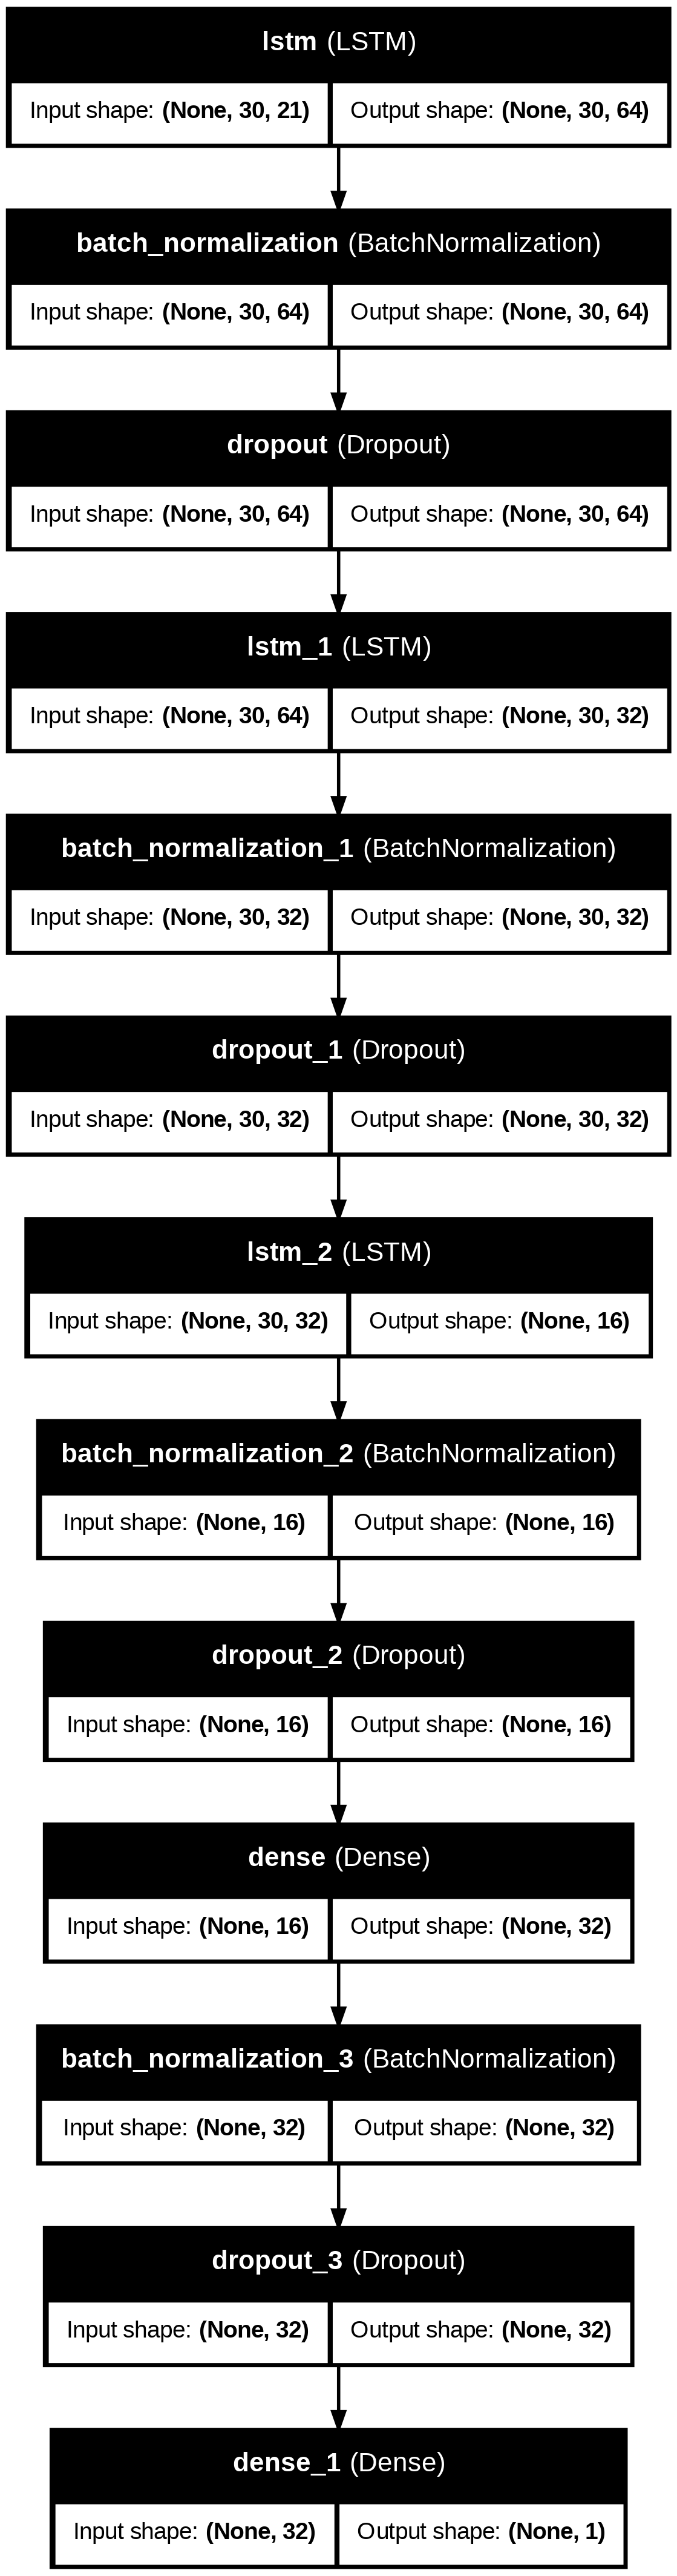

In [ ]:
from tensorflow.keras.utils import plot_model # Import plot_model from tensorflow.keras.utils

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8452 - loss: 0.3901 - val_accuracy: 0.9574 - val_loss: 0.1133
Epoch 2/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9439 - loss: 0.1618 - val_accuracy: 0.9611 - val_loss: 0.0904
Epoch 3/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9576 - loss: 0.1116 - val_accuracy: 0.9631 - val_loss: 0.0994
Epoch 4/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9630 - loss: 0.1005 - val_accuracy: 0.9743 - val_loss: 0.0625
Epoch 5/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9682 - loss: 0.0841 - val_accuracy: 0.9738 - val_loss: 0.0813
Epoch 6/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9729 - loss: 0.0698 - val_accuracy: 0.9335 - val_loss: 0.1521
Epoch 7/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9649 - loss: 0.0851 - val_accuracy: 0.9552 - val_loss: 0.1053
Epoch 8/25
444/444 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9712 - loss: 0.0677 - val_a

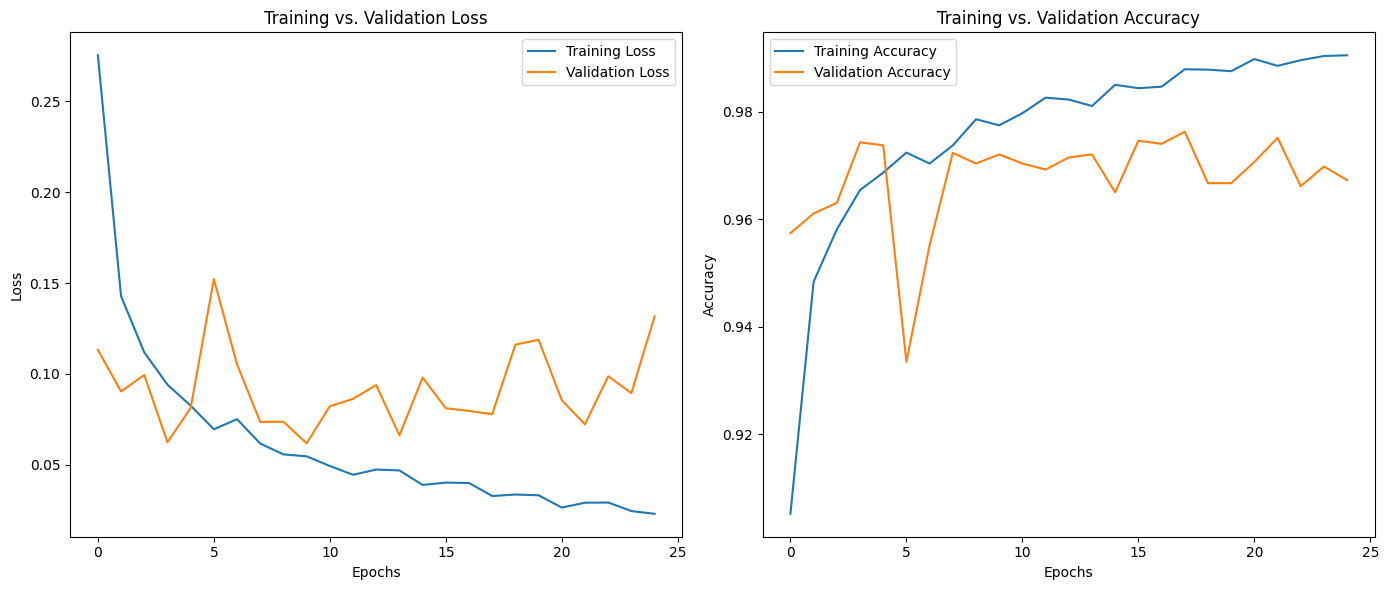

In [ ]:
# Extract loss values from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Extract accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the training loss vs. validation loss
plt.figure(figsize=(14, 6))

# Subplot for Loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation results
print("Model Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Model Evaluation Results:
Accuracy: 74.69%
Precision: 1.00
Recall: 0.09
F1 Score: 0.17


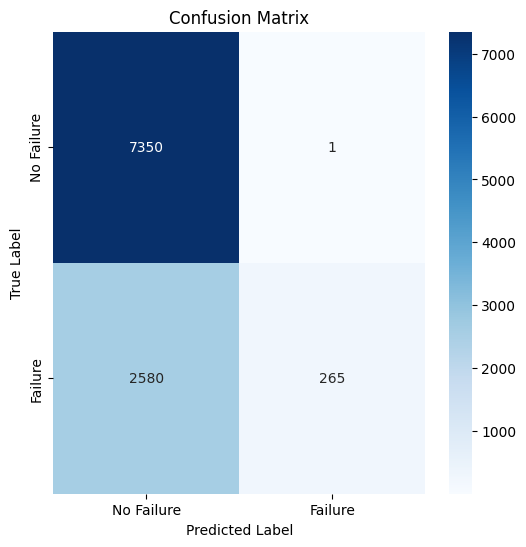

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Failure", "Failure"], yticklabels=["No Failure", "Failure"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
conf_matrix

array([[   0,    0],
       [   0, 9931]])

In [ ]:
test_df['label'].value_counts()

,count
label,
0,10096
1,3000
